# DS 3000 - Assignment: 4

**Student Name**: Ian Carr

**Date**: September 27, 2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: 

(0 pts) Load the data directly from the url into a dataframe.

In [2]:
df = pd.read_csv('Substance_Use_Disorder_Treatment_Program_Admissions__Beginning_2007.csv')
df

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2007,Albany,Crisis,Medical Managed Detoxification,Under 18,Heroin,4
1,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,All Others,2
2,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Other Opioids,6
3,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Heroin,132
4,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Alcohol,35
...,...,...,...,...,...,...,...
99362,2021,Yates,Outpatient,Outpatient Clinic,45 through 54,Alcohol,6
99363,2021,Yates,Outpatient,Outpatient Clinic,55 and Older,Cocaine,1
99364,2021,Yates,Outpatient,Outpatient Clinic,55 and Older,Marijuana,1
99365,2021,Yates,Outpatient,Outpatient Clinic,55 and Older,Heroin,1


## Question 2: 
(5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 2   Program Category            99367 non-null  object
 3   Service Type                99367 non-null  object
 4   Age Group                   99367 non-null  object
 5   Primary Substance Group     99366 non-null  object
 6   Admissions                  99367 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


Upon looking at the variable types, it appears that some of the variables are not represented in their expected types and can be converted from objects to category. Those variables are: County of Program Location, Program Category, Service Type, Age Group, Primary Substance Group. Both of the Year and Admissions variables are already integers which are their appropriate variables (confirmed by the data dictionary website to be numerical.) One thing to note is that there are no NaN values in any of the columns. One additional step of preparation I can preform would be to  check for duplicate data which could throw off analysis down the line. It is important to note that the variables above being converted from object to category are all nominal except for Age Group as that is ordinal as each age group comes after the next. In the following code I will preform these steps.

In [4]:
# converting variables to their respected types
df['County of Program Location']  = df['County of Program Location'].astype('category')
df['Program Category']  = df['Program Category'].astype('category')
df['Service Type']  = df['Service Type'].astype('category')
df['Age Group']  = df['Age Group'].astype('category')
df['Primary Substance Group']  = df['Primary Substance Group'].astype('category')

In [5]:
# checking if the variables were updated correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Year                        99367 non-null  int64   
 1   County of Program Location  99367 non-null  category
 2   Program Category            99367 non-null  category
 3   Service Type                99367 non-null  category
 4   Age Group                   99367 non-null  category
 5   Primary Substance Group     99366 non-null  category
 6   Admissions                  99367 non-null  int64   
dtypes: category(5), int64(2)
memory usage: 2.0 MB


In [6]:
# finding original number of rows before removing duplicate rows
original = df.shape[0]

In [7]:
# removing duplicate data rows from the dataframe
df.drop_duplicates(inplace=True)
# seeing how many rows remain in the dataframe
drop_dupes = df.shape[0]

In [8]:
print('Number of duplictae rows removed:', original - drop_dupes)

Number of duplictae rows removed: 0


In [9]:
# checking summary stats of all variables
df.describe(include='all')

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
count,99367.000000,99367,99367,99367,99367,99366,99367.000000
unique,NaN,61,6,28,6,6,NaN
top,NaN,New York,Outpatient,Outpatient Clinic,25 through 34,Alcohol,NaN
freq,NaN,5087,34873,27641,21479,19985,NaN
mean,2014.024747,NaN,NaN,NaN,NaN,NaN,41.913865
std,4.313423,NaN,NaN,NaN,NaN,NaN,122.875780
min,2007.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2010.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2014.000000,NaN,NaN,NaN,NaN,NaN,8.000000
75%,2018.000000,NaN,NaN,NaN,NaN,NaN,28.000000


It appears that all of the variables are within their normal ranges as described by the dictionary and that there were no duplicate rows.

## Question 3: 
(10 pts) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you choose an appropriate graph based on the type of data. Explain each chart.


Text(0.5, 1.0, 'Distribution of Patient Ages')

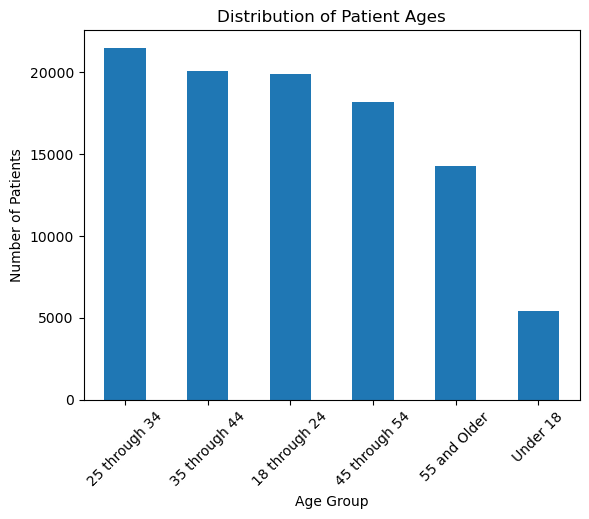

In [10]:
df['Age Group'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Patients')
plt.xticks(rotation =45)
plt.title('Distribution of Patient Ages')

This graph shows the distribution of the number of patients from each age group. The 25 though 24 age group had the most number of patients in the program. 

Text(0.5, 1.0, 'Distribution of Patients Program Type')

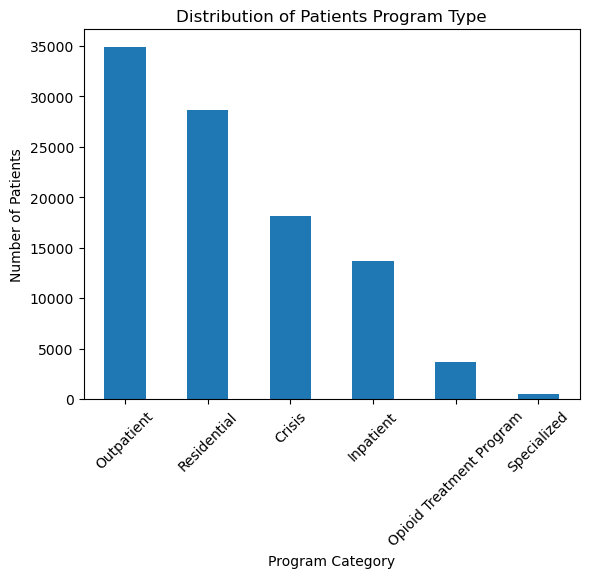

In [11]:
df['Program Category'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Patients')
plt.xticks(rotation =45)
plt.title('Distribution of Patients Program Type')

This graph shows the distribution of the number of patients from each program category. The Outpatient program had the most number of patients compared to the other categories. 

Text(0.5, 1.0, 'Distribution of Primary Substances of Patients')

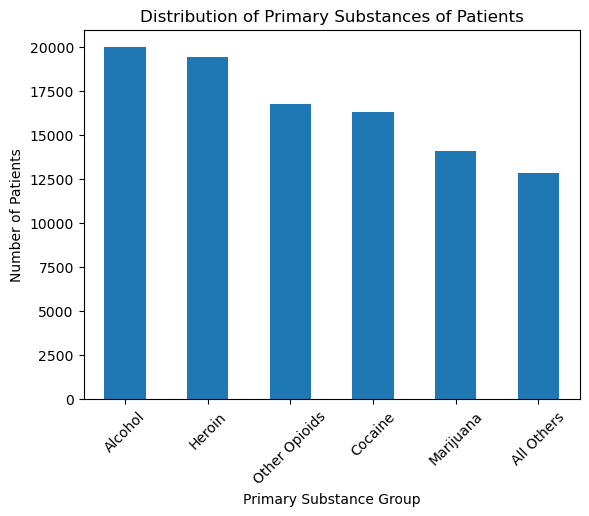

In [12]:
df['Primary Substance Group'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Patients')
plt.xticks(rotation =45)
plt.title('Distribution of Primary Substances of Patients')

This graph shows the distribution of the primary substance group of each patient. Alcohol was the primary substance of the most number of patients compared to the other substances. 

Text(0.5, 1.0, 'Number of Admissions Each Year')

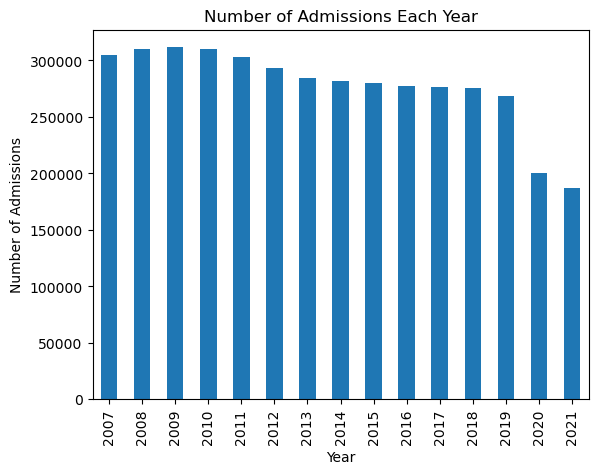

In [13]:
df.groupby('Year')['Admissions'].sum().plot(kind = 'bar')
plt.ylabel('Number of Admissions')
plt.title('Number of Admissions Each Year')

This graph shows the distribution of the number of patients admitted year over year. 2009 was the year with the most admissions and 2021 was the year with the least.

## Question 4: 
(5 pts) Create a function called annualAdmissions() that calculates the total number of reported admissions that transpired each year, for the entire state of NY and display the results using a line chart. Annotate the chart to show the year with the highest number of admissions.

Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed over time.

In [14]:
def annualAdmissions(df):
    # group data by year and sum of admissions into a series
    annual_admissions = df.groupby('Year')['Admissions'].sum()
    # make series into df to pull min and max
    data4 = pd.DataFrame(annual_admissions)
    # pull min and max values
    year = data4['Admissions'].idxmax()
    admissions = data4['Admissions'].max()
    # plot the line chart and annotate point
    plt.plot(data4)
    plt.plot(year, admissions, 'ro', label=('Highest Admissions'))
    plt.ylabel('Number of Patients Admitted Each Year')
    plt.annotate(('Highest Admissions', (year, admissions)), xy=(year, admissions))

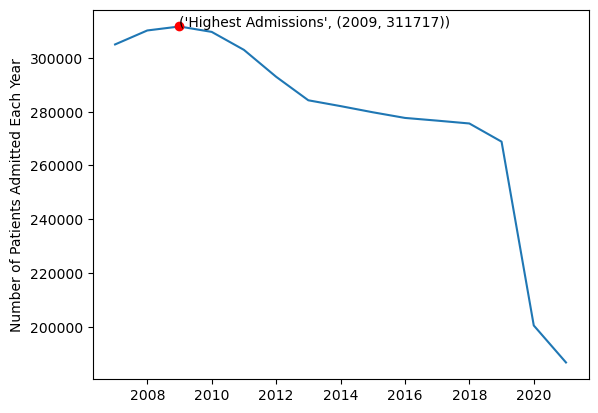

In [15]:
annualAdmissions(df)

The chart shows the number of patients admitted into the program each year for the duration of the dataset. The general trends show that there was a peak in 2009 and then a consistent drop in the number patients admitted each year after. There also looks to be the biggest drop in the number of patients admitted from 2019-2020. This data also correlates with my response to question three, strengthing the visualization.

## Question 5: 
(10 pts) Create a function called annualAdmissionsByCounty(year). The function should take the year as input, filter the data to find all admissions for that year and calculate the proportion of admissions grouped by county. For example, if the year is 2007, the function should calculate the admissions as follows: county A 75%, county B 20% and county C 2.5%, etc. Display a bar chart with the top 10 counties. Using a new cell, visualize the annualAdmissionsByCounty() for the last 10 years. 

What are the patterns that you have observed?
Note: Ensure that you visualize the results.

In [16]:
def annualAdmissionsByCounty(df, year):
    year_df = df[df['Year']==year]
    annual_admissions = year_df.groupby('County of Program Location')['Admissions'].sum()
    # make series into df to pull min and max
    data5 = pd.DataFrame(annual_admissions)
    # sort dataframe and find the top ten counties 
    data5 = data5.sort_values(by='Admissions', ascending=False)
    data5 = data5[0:10]
    #find proportions and make new column in the dataframe
    total = data5['Admissions'].sum()
    data5['Percentage'] = round((data5['Admissions'] / total) * 100, 2)
    # plot the data in a bar chart
    data5['Percentage'].plot(kind='bar')
    plt.ylabel("Percentage of Patients")
    plt.xticks(rotation =45)
    plt.title("Percentage of Patients Admitted for Top 10 Counties in " + str(year))
    plt.text(3, data5['Percentage'].max() - 2, f'Number of Patients Admitted: {total}', fontsize=10)
    plt.legend
    plt.show

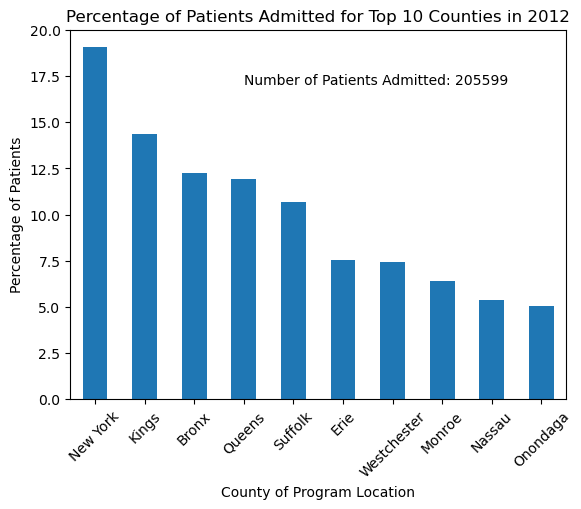

In [17]:
annualAdmissionsByCounty(df, 2012)

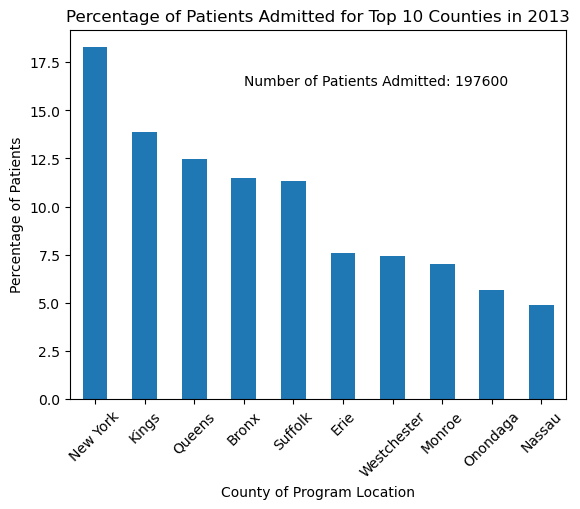

In [18]:
annualAdmissionsByCounty(df, 2013)

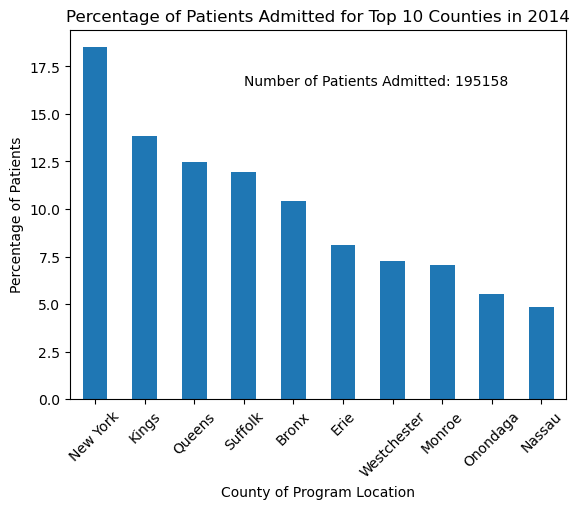

In [19]:
annualAdmissionsByCounty(df, 2014)

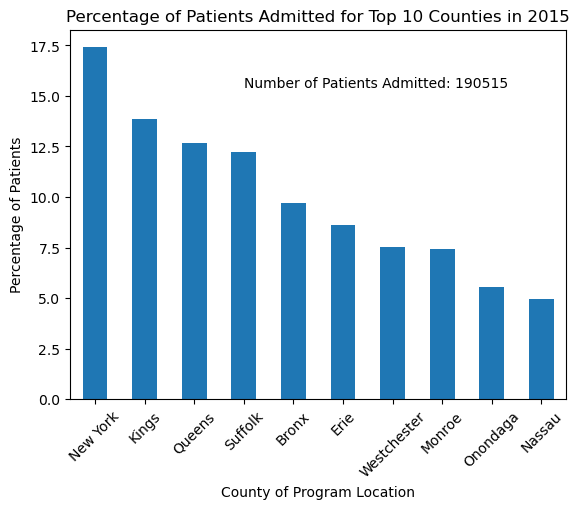

In [20]:
annualAdmissionsByCounty(df, 2015)

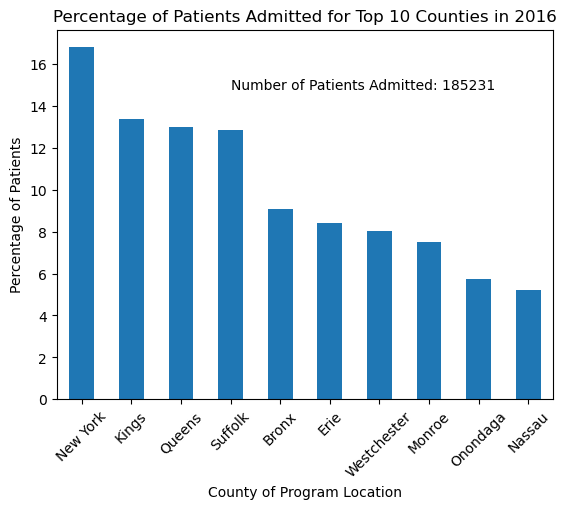

In [21]:
annualAdmissionsByCounty(df, 2016)

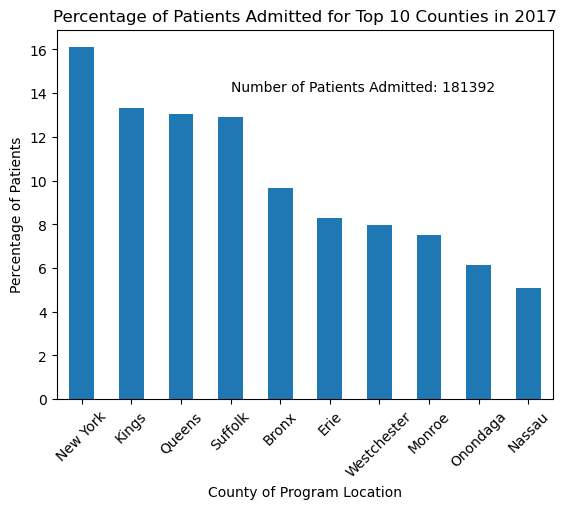

In [22]:
annualAdmissionsByCounty(df, 2017)

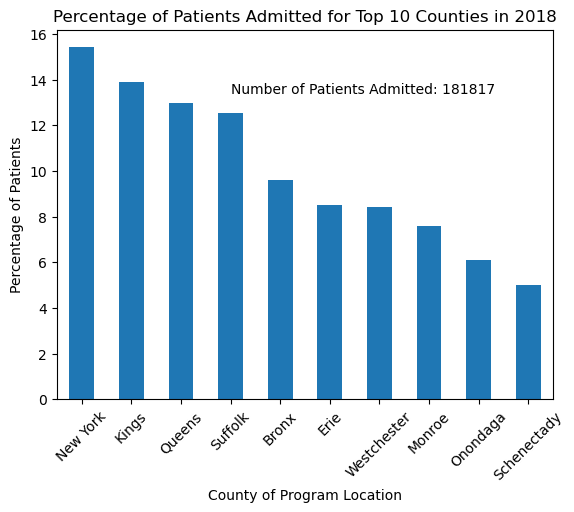

In [23]:
annualAdmissionsByCounty(df, 2018)

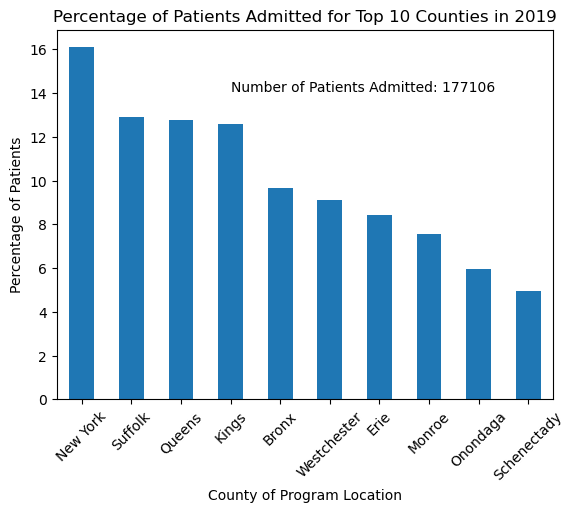

In [24]:
annualAdmissionsByCounty(df, 2019)

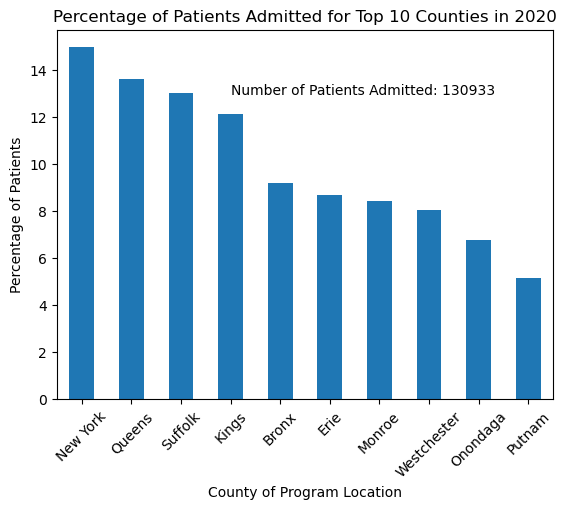

In [25]:
annualAdmissionsByCounty(df, 2020)

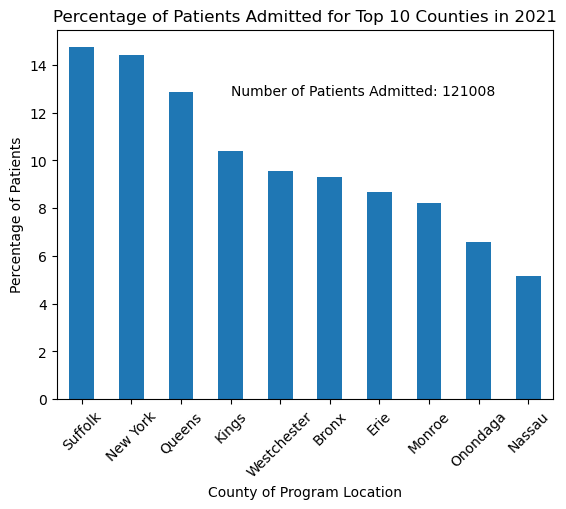

In [26]:
annualAdmissionsByCounty(df, 2021)

One pattern emerging from the graphs is that New York is always the county with the highest number of patients admitted besides the last year. Another pattern one can observe would be that the top 5 and bottom 5 stay almost the same throughout the entire data set. The only time Bronx isn't in the top 5 is the last year of the data. Its interesting to note that the data is showing that the proprtions do not vary much year over year, no matter what the county orders are.

## Question 6: 
(10 pts) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

''

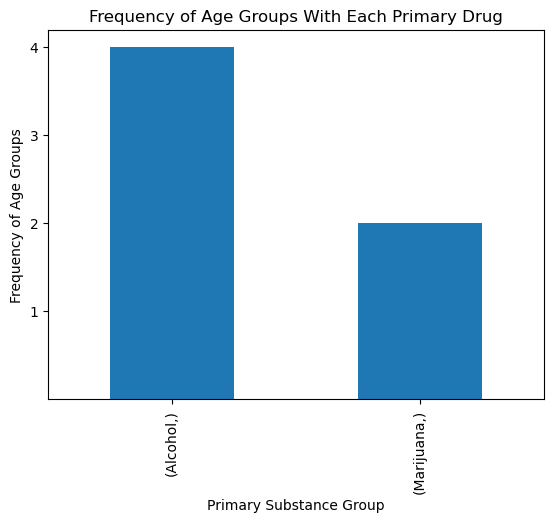

In [27]:
rehab_data = df[df['Service Type'].str.contains('rehab', case=False)]
data6 = rehab_data.groupby('Age Group')['Primary Substance Group'].apply(lambda x: x.value_counts().idxmax())
data6 = pd.DataFrame(data6)
data6.value_counts().plot(kind='bar')
plt.yticks([1, 2, 3, 4])
plt.ylabel('Frequency of Age Groups')
plt.title('Frequency of Age Groups With Each Primary Drug')
;

I used my notes from DS2500 in order to use the .apply(lambda) function.

The results of this data are showing that Alcohol is the overall primary substance of the most number of age groups. Marijuana is the second and only other overall primary substance of age groups that have data. Both of these drugs represent the most popular drug for the age group and then those drugs were tallied in order to find the frequencies to chart. Alcohol was the primary substance of four age groups and Marijuana was the primary substance of two age groups. 

## Question 7: 
(10 pts) Using the filtered “rehab” data from question 6 above, identify any patterns in the admission to rehab facilities in any 5 counties and substance groups. Explain your observations.

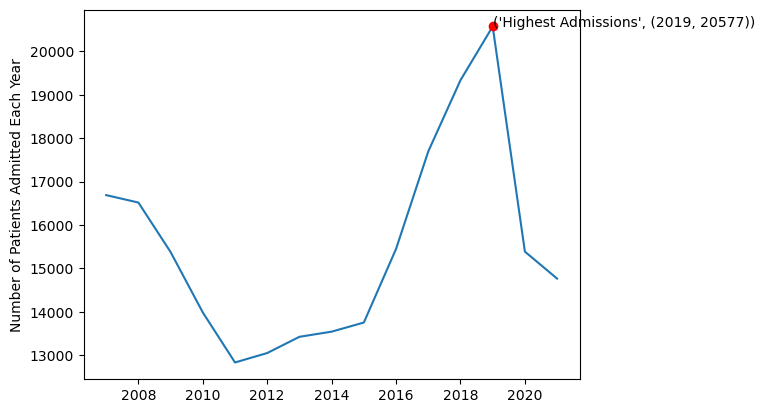

In [61]:
drugs = ['Alcohol', 'Marijuana', 'Cocaine', 'Heroin', 'All Others']
counties = ['New York', 'Suffolk', 'Queens', 'Kings', 'Bronx']
drugs_filtered = rehab_data[rehab_data['Primary Substance Group'].isin(drugs)]
data7 = drugs_filtered[drugs_filtered['County of Program Location'].isin(counties)]
annualAdmissions(data7)

In [67]:
# editing a function for more analysis by making it more customizable
def annualAdmissionsBy(df, year, by):
    year_df = df[df['Year']==year]
    annual_admissions = year_df.groupby(by)['Admissions'].sum()
    # make series into df to pull min and max
    data5 = pd.DataFrame(annual_admissions)
    # sort dataframe and find the top ten counties 
    data5 = data5.sort_values(by='Admissions', ascending=False)
    data5 = data5[0:5]
    #find proportions and make new column in the dataframe
    total = data5['Admissions'].sum()
    data5['Percentage'] = round((data5['Admissions'] / total) * 100, 2)
    # plot the data in a bar chart
    data5['Percentage'].plot(kind='bar')
    plt.ylabel('Percentage of Patients')
    plt.xticks(rotation =45)
    plt.title('Percentage of Patients Admitted')
    plt.text(3, data5['Percentage'].max() - 2, f'Number of Patients Admitted: {total}', fontsize=10)
    plt.legend
    plt.show

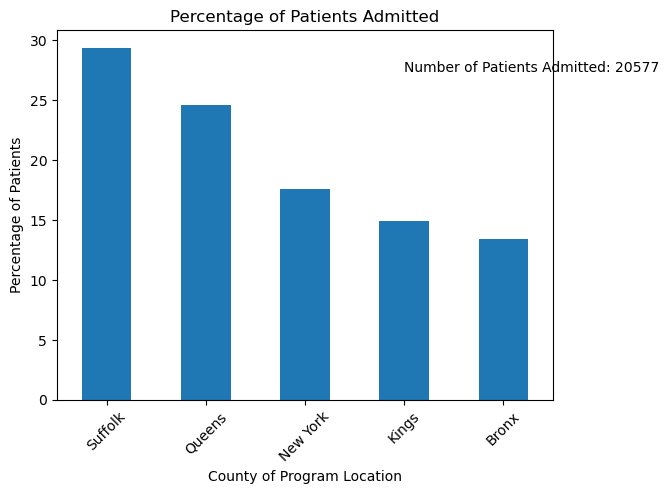

In [68]:
annualAdmissionsBy(data7, 2019, 'County of Program Location')

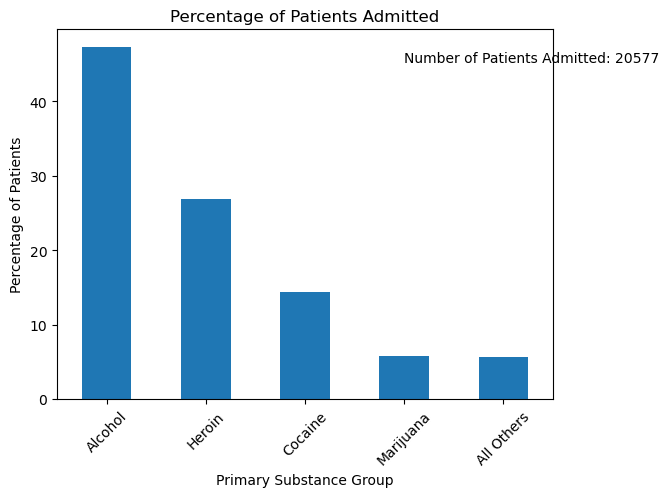

In [69]:
annualAdmissionsBy(data7, 2019, 'Primary Substance Group')

When looking at the data, I decided to pick the top 5 most common counties I saw in the last ten years during questions five. I decided to pick five drugs that I personally feel like I hear about in the news, opting for all other to have more data. This dataset is interesting as there as other outside variables that could affect the data, such as how did the user start using their drug of choice. This makes me think that there could be 'gate-way' drugs that are being used in addition to the drugs that are being listed by the patient in their admission forms. The patterns shown by slicing the data to my specific counties and drugs shows that there was actualy a dip in admissions before the highest admissions seen in 2019, followed by a stark drop in admission in the two following years. When looking at the specific counties for only the drugs I chose during the year you can see that Suffolk is actually the county with the most admissions, unlike the 2019 results from question five where New York is the top county. This leads me to believe that Suffolk drug use expereinced a surge in popularity during 2019 as 2019 when unsliced looked to be on of the lower years of admissions, as seen on the graph from question four. This theory is supported by the general proportions of the the graph with Suffolk taking a substantial lead. The data is showing that the drugs chosen were more popular in Suffolk in 2019.

## Question 8: 
(5 pts)[optional/bonus] Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.


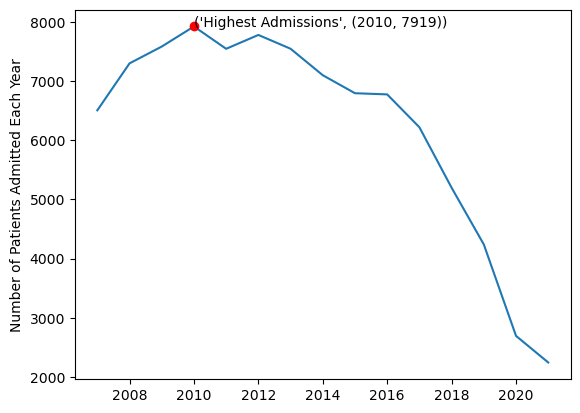

In [70]:
my_age_rehab = rehab_data[rehab_data['Age Group']=='18 through 24']
annualAdmissions(my_age_rehab)

One extra visualization I can make would be to use the previous function I made to annualize admissions. An interesting thing to visualize would be taking a look at only rehab admissions for my own age group. I did this by subsetting the rehab dataframe down to my age group, I am 21, and then passing that new dataframe to my function to annualize the data. The data shows a spike in admissions in 2010 with 7919 admissions and then after that there is an almost perfect decline in the number of admissions. There also is the lowest admissions by year in 2021.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
